# gun-violence-analysis

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="gun-violence-analysis")

<IPython.core.display.Javascript object>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [6]:
gun_df = pd.read_csv('all_incidents.csv')

In [7]:
gun_df

,incident_id,date,state,city,address,n_killed,n_injured
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0
...,...,...,...,...,...,...,...
472815,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2
472816,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0
472817,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3
472818,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3


In [8]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472820 entries, 0 to 472819
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   incident_id  472820 non-null  int64 
 1   date         472820 non-null  object
 2   state        472820 non-null  object
 3   city         472820 non-null  object
 4   address      449089 non-null  object
 5   n_killed     472820 non-null  int64 
 6   n_injured    472820 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 25.3+ MB


In [9]:
gun_df.shape

(472820, 7)

In [10]:
gun_df_copy = gun_df.copy

In [11]:
gun_df_copy

<bound method NDFrame.copy of         incident_id        date           state         city  \
0           2314858  2022-05-28        Arkansas  Little Rock   
1           2314409  2022-05-28        Colorado       Denver   
2           2314498  2022-05-28        Missouri  Saint Louis   
3           2314485  2022-05-28  South Carolina     Florence   
4           2314483  2022-05-28      California   Carmichael   
...             ...         ...             ...          ...   
472815       478959  2013-01-07  North Carolina   Greensboro   
472816       478925  2013-01-05        Colorado       Aurora   
472817       478855  2013-01-01            Ohio       Lorain   
472818       460726  2013-01-01      California    Hawthorne   
472819       461105  2013-01-01    Pennsylvania   Mckeesport   

                                          address  n_killed  n_injured  
0                        W 9th St and Broadway St         0          1  
1                           3300 block of Clay St      

In [12]:
gun_df.isnull().sum()

incident_id        0
date               0
state              0
city               0
address        23731
n_killed           0
n_injured          0
dtype: int64

In [13]:
gun_df["address"].fillna("Not Available", inplace = True)

In [14]:
gun_df.isnull().sum()

incident_id    0
date           0
state          0
city           0
address        0
n_killed       0
n_injured      0
dtype: int64

In [15]:
gun_df.head()

,incident_id,date,state,city,address,n_killed,n_injured
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0


In [16]:
max_gun_violence = gun_df.state.value_counts(sort=True).head(10)

In [17]:
max_gun_violence

Illinois          35814
California        30745
Texas             30190
Florida           26620
Pennsylvania      21258
Ohio              20596
New York          20151
North Carolina    16465
Georgia           16252
Louisiana         15726
Name: state, dtype: int64

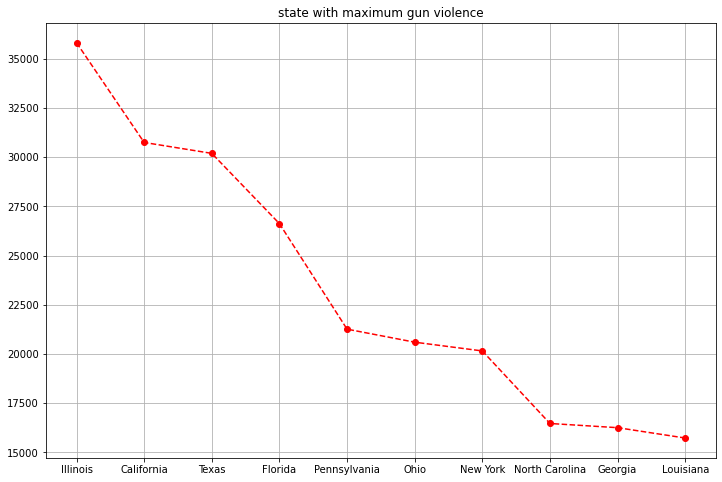

In [18]:
plt.figure(figsize=(12,8));
plt.grid()
plt.title("state with maximum gun violence")
plt.plot(max_gun_violence, 'o--r');

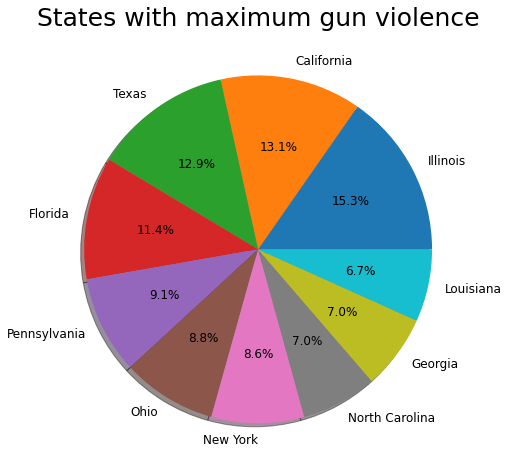

In [19]:
plt.figure(figsize=(10,8))
plt.tick_params(labelsize=5)
plt.title("States with maximum gun violence", fontsize = 25)
plt.pie(max_gun_violence, labels=max_gun_violence.index, autopct='%1.1f%%', shadow=True, textprops={'fontsize' : 12});

In [20]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

In [21]:
gun_df.columns

Index(['incident_id', 'date', 'state', 'city', 'address', 'n_killed',
       'n_injured'],
      dtype='object')

In [22]:
gun_df.head()

,incident_id,date,state,city,address,n_killed,n_injured
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0


## How many people were kiiled

In [26]:
killed_total = gun_df.n_killed.sum()
killed_total

135775

## How many people were injured

In [29]:
injured_total = gun_df.n_injured.sum()
injured_total

265850

## Total Killed in illinois  

In [35]:
illinois_killing = gun_df['n_killed'].groupby(gun_df['state']).sum()['Illinois']
illinois_killing

7535

In [37]:
illinois_injured = gun_df['n_injured'].groupby(gun_df['state']).sum()['Illinois']
illinois_injured

28832

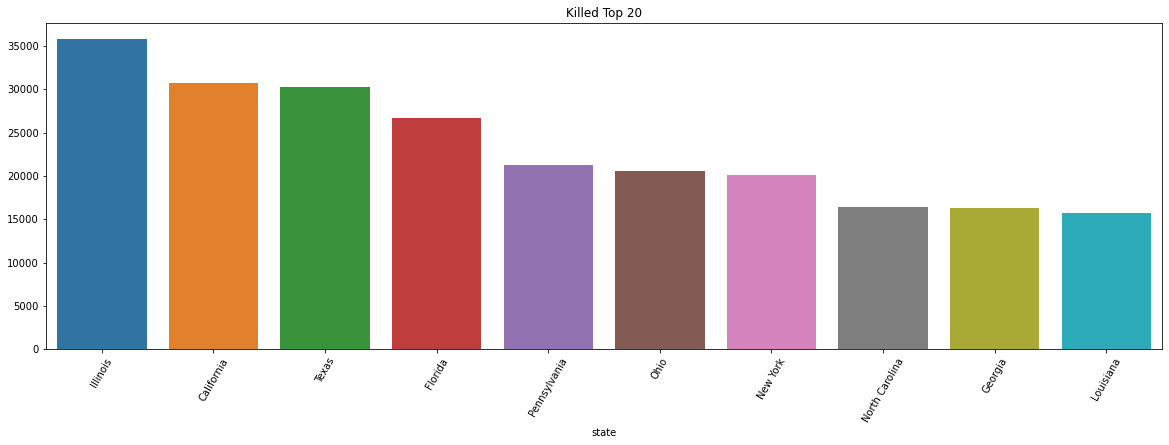

In [43]:
plt.figure(figsize=(20,6))
top_10_killed = gun_df.groupby('state')['n_killed'].count().sort_values(ascending = False).head(10)
sns.barplot(x=top_10.index, y = top_10.values)
plt.title('Killed Top 20')
plt.xticks(rotation='60')
plt.show()

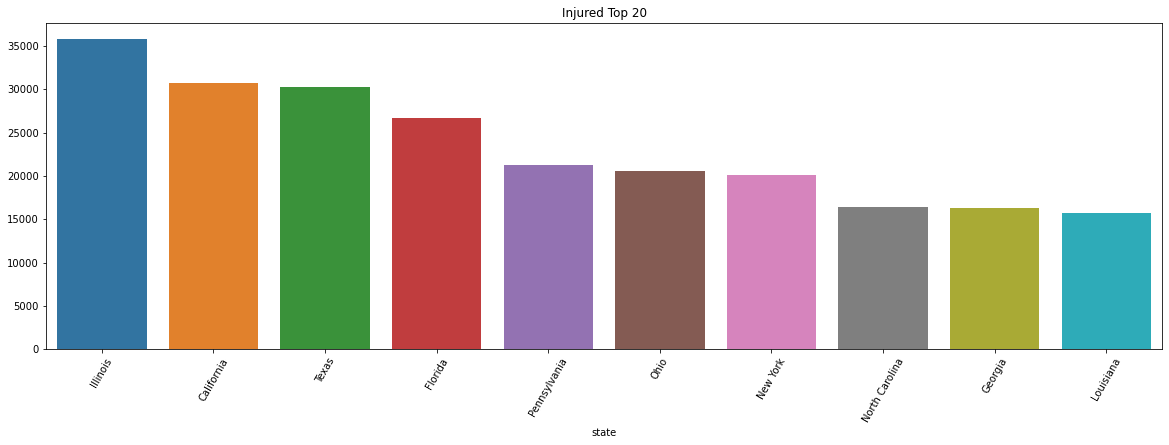

In [47]:
plt.figure(figsize=(20,6))
top_10_injured = gun_df.groupby('state')['n_injured'].count().sort_values(ascending = False).head(10)
sns.barplot(x=top_10.index, y = top_10.values)
plt.title('Injured Top 20')
plt.xticks(rotation='60')
plt.show()

In [51]:
gun_df.columns

Index(['incident_id', 'date', 'state', 'city', 'address', 'n_killed',
       'n_injured'],
      dtype='object')

In [54]:
gun_df['year'] = pd.DatetimeIndex(gun_df['date']).year
gun_df.head()

,incident_id,date,state,city,address,n_killed,n_injured,year
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1,2022
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1,2022
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1,2022
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2,2022
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0,2022


In [57]:
gun_df['month'] = pd.DatetimeIndex(gun_df['date']).month
gun_df.head()

,incident_id,date,state,city,address,n_killed,n_injured,year,month
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1,2022,5
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1,2022,5
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1,2022,5
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2,2022,5
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0,2022,5


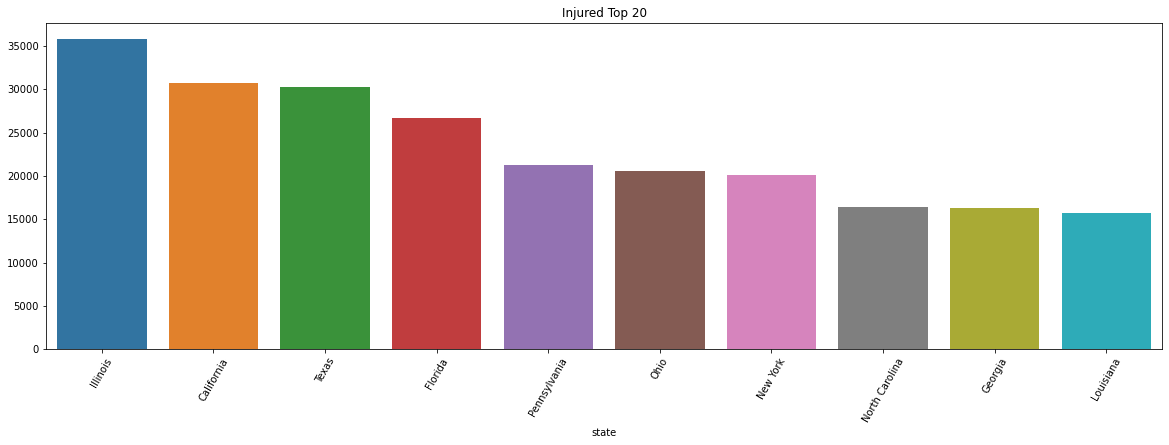

In [58]:
plt.figure(figsize=(20,6))
top_10_year = gun_df.groupby('year')['n_injured'].count().sort_values(ascending = False).head(10)
sns.barplot(x=top_10.index, y = top_10.values)
plt.title('Injured Top 20')
plt.xticks(rotation='60')
plt.show()

In [60]:
top_10_year = gun_df.groupby('year')['n_injured'].count().sort_values(ascending = False).head(10)
top_10_year

year
2020    62330
2017    61401
2016    58763
2021    56794
2018    55839
2019    53752
2015    53579
2014    51854
2022    18230
2013      278
Name: n_injured, dtype: int64

In [1]:
ind = np.arange(len(gun_df))
width = 0.36

fig1, ax1 = plt.subplots()
ax1.barh(ind, gun_df.n_injured, width, color='#3399FF', label="Injured")
ax1.barh(ind + width, gun_df.n_killed, width, color='#9966CC', label="Killed")

ax1.set(yticks=ind + width, yticklabels=gun_df.Year, ylim=[2*width - 1, len(gun_df)])
ax1.set_title("Number of Movies and TV Shows added to Netflix (by year)", fontsize=18)
ax1.set_ylabel("Year added to Netflix", fontsize=14)
ax1.set_xlabel("Number of Movies and TV Shows", fontsize=14)
ax1.legend()

fig1.set_size_inches(16, 16)
plt.show()

NameError: name 'np' is not defined